In [102]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('train1.csv',usecols=['Age','Fare','Survived'])

In [104]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [105]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [107]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [108]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [109]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/3027692268.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().s

In [110]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 6.  , 56.  , 18.  , 33.  , 25.  , 19.  , 14.  , 16.  , 28.  ,
       22.  , 65.  , 39.  , 21.  , 14.  ,  7.  , 52.  , 39.  , 32.  ,
        4.  , 17.  , 40.  , 29.  , 42.  , 16.  , 31.  , 64.  , 24.  ,
        2.  , 45.  ,  0.75, 42.  ,  9.  , 39.  , 31.  , 71.  , 45.  ,
       32.  , 26.  , 29.  ,  7.  , 36.  , 24.  , 36.  , 21.  , 70.  ,
       46.  , 50.  , 48.  , 30.  , 19.  , 19.  , 44.  , 47.  , 24.  ,
       23.  , 31.  , 35.  , 36.  , 31.  , 30.  , 19.  , 37.  , 33.  ,
       56.  , 40.  , 30.  , 48.  , 32.  , 48.  ,  2.  , 20.  , 30.  ,
       40.  , 31.  , 54.  , 16.  , 44.  , 36.  , 11.  , 37.  ,  4.  ,
       39.  , 25.  , 28.  , 24.  , 25.  , 58.  , 25.  , 17.  , 58.  ,
       28.  , 30.  , 24.  , 28.  , 24.  , 22.  , 18.  , 45.5 , 14.  ,
       24.  , 31.  , 21.  , 60.  , 42.  , 25.  , 40.5 , 18.  ,  2.  ,
       43.  , 41.  , 27.  , 46.  , 31.  ,  0.75, 23.  , 22.  , 42.  ,
       29.  , 32.  , 37.  , 27.  , 21.  , 48.  , 34.  , 36.  , 71.  ,
       23.  , 30.5 ,

In [111]:
X_train['Age'].isnull().sum()

np.int64(148)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

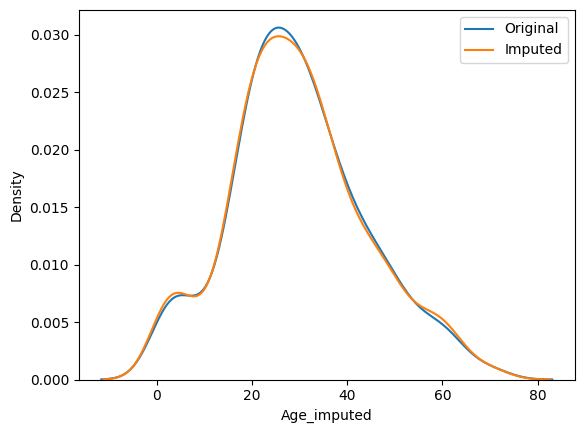

In [112]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [113]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  209.87449045259882


In [114]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,62.231353
Age,71.512440,204.349513,204.349513
Age_imputed,62.231353,204.349513,209.874490


In [115]:
X_train[['Fare', 'Age', 'Age_imputed']].corr()

,Fare,Age,Age_imputed
Fare,1.000000,0.095814,0.088271
Age,0.095814,1.000000,1.000000
Age_imputed,0.088271,1.000000,1.000000


<Axes: >

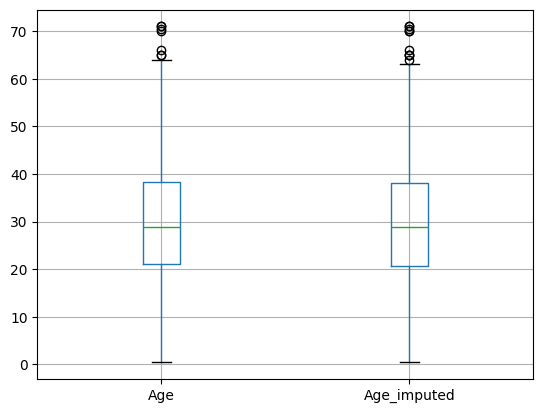

In [116]:
X_train[['Age', 'Age_imputed']].boxplot()

In [117]:
observation = X_train.iloc[0]
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [118]:
sampled_value

399    28.0
Name: Age, dtype: float64

In [119]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [120]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [121]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [122]:
X = data
y = data['SalePrice']

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [125]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
371,Gd,TA,134432,TA,Gd
1229,NaN,TA,127000,TA,NaN
979,NaN,TA,139000,TA,NaN
901,NaN,TA,153000,TA,NaN
835,NaN,TA,128000,TA,NaN


In [126]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_tr

In [127]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [128]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [129]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.539843
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.031425


/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

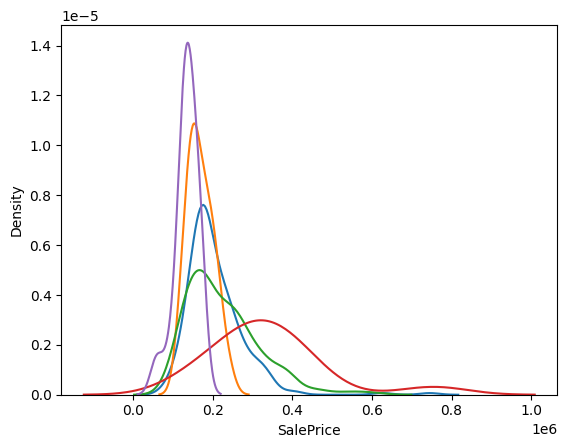

In [130]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_88770/722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.

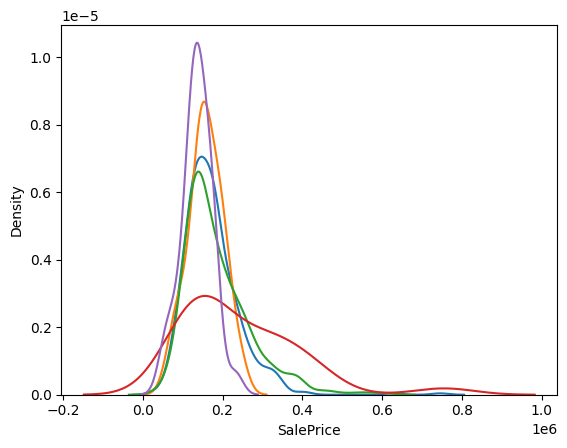

In [132]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()